In [139]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [158]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [159]:
data.drop(data[(data['height'].isna()) | (data['dob'].isna())].index, inplace=True)

In [165]:
data[data['weight'].isna()]['weight'].median()
woman_weight = data[data['sex'] == 'female']['weight'].median()
man_weight = data[data['sex'] == 'male']['weight'].median()

data.loc[(data['sex'] == 'female') & (data['weight'].isna()), ['weight']] = woman_weight
data.loc[(data['sex'] == 'male') & (data['weight'].isna()), ['weight']] = man_weight
data.describe()


,id,height,weight,gold,silver,bronze
count,1.120800e+04,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000
mean,4.999777e+08,1.766282,71.424161,0.059154,0.057816,0.062099
std,2.909163e+08,0.112719,14.610024,0.259001,0.240930,0.245378
min,1.834700e+04,1.210000,39.000000,0.000000,0.000000,0.000000
25%,2.450723e+08,1.690000,61.000000,0.000000,0.000000,0.000000
50%,4.996176e+08,1.760000,62.000000,0.000000,0.000000,0.000000
75%,7.538453e+08,1.840000,79.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [166]:
data['sport'].value_counts()
df = data[['dob', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze', 'sex']]
df.head()
df['age'] = df['dob'].apply(lambda x: 122-int(str(x[-2:])))
del df['dob']

<ipython-input-166-30e1e961734b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['dob'].apply(lambda x: 122-int(str(x[-2:])))


In [167]:
df.head()

,height,weight,sport,gold,silver,bronze,sex,age
0,1.72,64.0,athletics,0,0,0,male,53
1,1.68,61.0,fencing,0,0,0,female,36
2,1.98,79.0,athletics,0,0,1,male,30
3,1.83,80.0,taekwondo,0,0,0,male,31
4,1.81,71.0,cycling,0,0,0,male,32


In [168]:
le = LabelEncoder()
le.fit( df['sex'])
Y = pd.Series (data = le.transform(df['sex']))
Y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [169]:
le = LabelEncoder()
le.fit( df['sport'])
df['sport_code'] = le.transform(df['sport'])
del df['sport']
del df['sex']
X = df
X

<ipython-input-169-5aa85042a2c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sport_code'] = le.transform(df['sport'])


,height,weight,gold,silver,bronze,age,sport_code
0,1.72,64.0,0,0,0,53,2
1,1.68,61.0,0,0,0,36,9
2,1.98,79.0,0,0,1,30,2
3,1.83,80.0,0,0,0,31,22
4,1.81,71.0,0,0,0,32,7
...,...,...,...,...,...,...,...
11533,1.64,61.0,0,0,0,27,2
11534,1.73,61.0,0,0,0,36,2
11535,1.85,100.0,0,0,0,31,27
11536,1.60,56.0,0,0,0,33,26


In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [171]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [172]:
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [173]:
predictions = model.predict_proba(X_test)
predictions

array([[3.35234853e-03, 9.96647651e-01],
       [1.51004965e-05, 9.99984900e-01],
       [8.44136382e-01, 1.55863618e-01],
       ...,
       [2.27284916e-05, 9.99977272e-01],
       [8.25945371e-01, 1.74054629e-01],
       [3.76599813e-02, 9.62340019e-01]])

In [174]:
model.score(X_train, Y_train)

0.9306268124024091

In [175]:
model.score(X_test, Y_test)

0.932649420160571

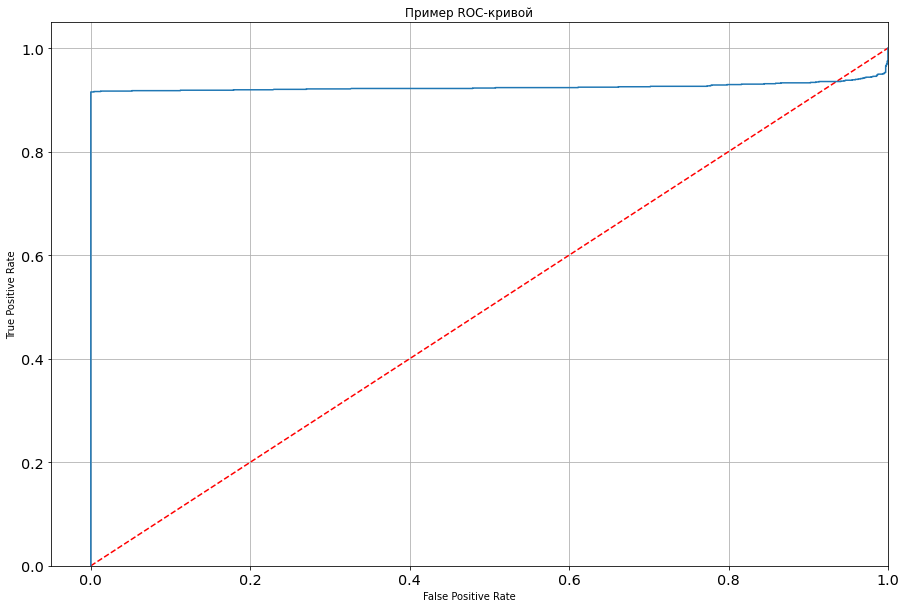

In [176]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')

plt.rcParams.update(params)
plt.plot(fpr, tpr)
plt.grid()

In [177]:
roc_auc_score( Y_test, predictions[:, 1] )

0.924674816235219

вывод: модель обучилась хорошо

In [178]:
# считаем метрики вручную:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [179]:
TPR = tp/(tp+fn)
TPR

0.8733221476510067

In [180]:
FPR = fp/(fp+tn)
FPR

0.0

считаем вручную  метрики для построения roc и pr:

In [181]:
# считаем метрики вручную:

tpr = [] # recall
fpr = [] 
precision = []

threshold = 0
while threshold <= 1:
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    
    for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    tpr.append(tp/(tp+fn)) 
    fpr.append(fp/(fp+tn))
    precision.append((tp/(tp+fp)))
    threshold += 0.05
tpr, fpr, precision

([1.0,
  0.9656040268456376,
  0.9429530201342282,
  0.9261744966442953,
  0.9186241610738255,
  0.9161073825503355,
  0.9093959731543624,
  0.9018456375838926,
  0.8942953020134228,
  0.8825503355704698,
  0.8733221476510067,
  0.8615771812080537,
  0.8557046979865772,
  0.8489932885906041,
  0.8414429530201343,
  0.8338926174496645,
  0.8238255033557047,
  0.8011744966442953,
  0.7827181208053692,
  0.7323825503355704],
 [1.0,
  0.9980952380952381,
  0.9704761904761905,
  0.7542857142857143,
  0.1742857142857143,
  0.004761904761904762,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.5316681534344335,
  0.5234197362437472,
  0.5244983667755483,
  0.5822784810126582,
  0.8568075117370892,
  0.9954421148587056,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0])

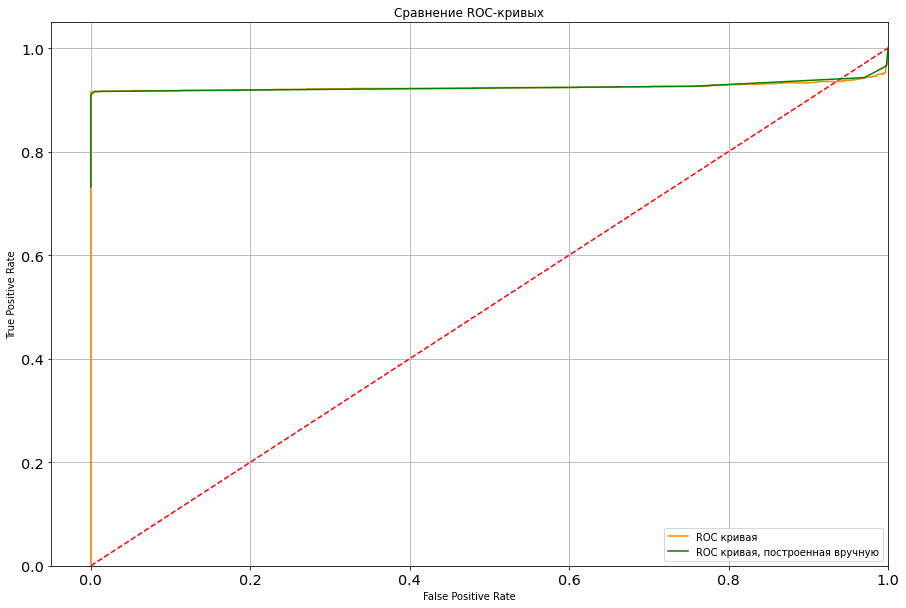

In [182]:
fpr_, tpr_, thres = roc_curve(Y_test, predictions[:, 1])

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC-кривых')

plt.rcParams.update(params)
plt.plot(fpr_, tpr_, color='darkorange', label = 'ROC кривая')
plt.plot(fpr, tpr, color='green', label = 'ROC кривая, построенная вручную')
plt.legend(loc="lower right")
plt.grid()

Графики кривых ROC, построенные вручную и автоматически,  почти совпали, значит, рассчеты верны.

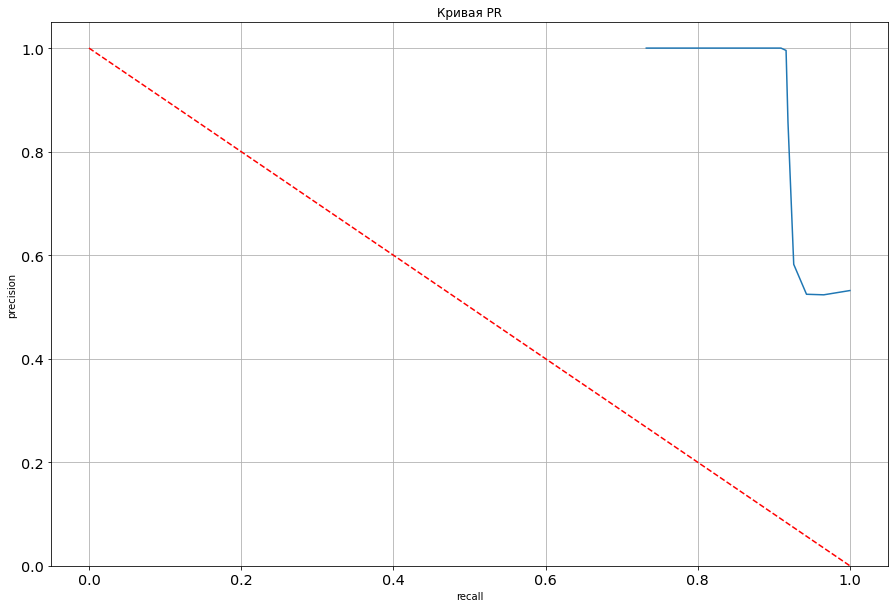

In [183]:
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot([0, 1], [1, 0], color='red', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Кривая PR')

plt.rcParams.update(params)
plt.plot(tpr, precision)
plt.grid()

Исходя из построенных кривых и посчитанных метрик, наша модель обучилась идеально. Кривые ROC и PR лежат значительно выше соответствующих диагоналей, следовательно качество обучение очень хорошее. Если кривая ROC лежит ниже диагонали, то тогда наша модель будет показывает качество классификации на уровне или ниже случайного предсказания.